<a href="https://colab.research.google.com/github/Scotti001/Scotti001/blob/master/redes%20kohonen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install palmerpenguins


In [2]:
from palmerpenguins import load_penguins
import pandas as pd

# Carregar os dados
penguins = load_penguins()

# Exibir as primeiras linhas
print(penguins.head())

# Informações básicas
print(penguins.info())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      3

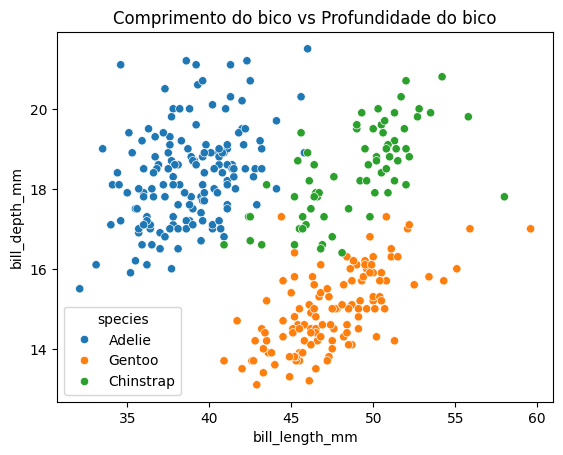

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersão: comprimento do bico vs. profundidade do bico
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.title("Comprimento do bico vs Profundidade do bico")
plt.show()


In [5]:
pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=fa24e3da18b45ebd3b63ab1ebbdaa506e33c2e778bc5a3acb0dcda700b290486
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


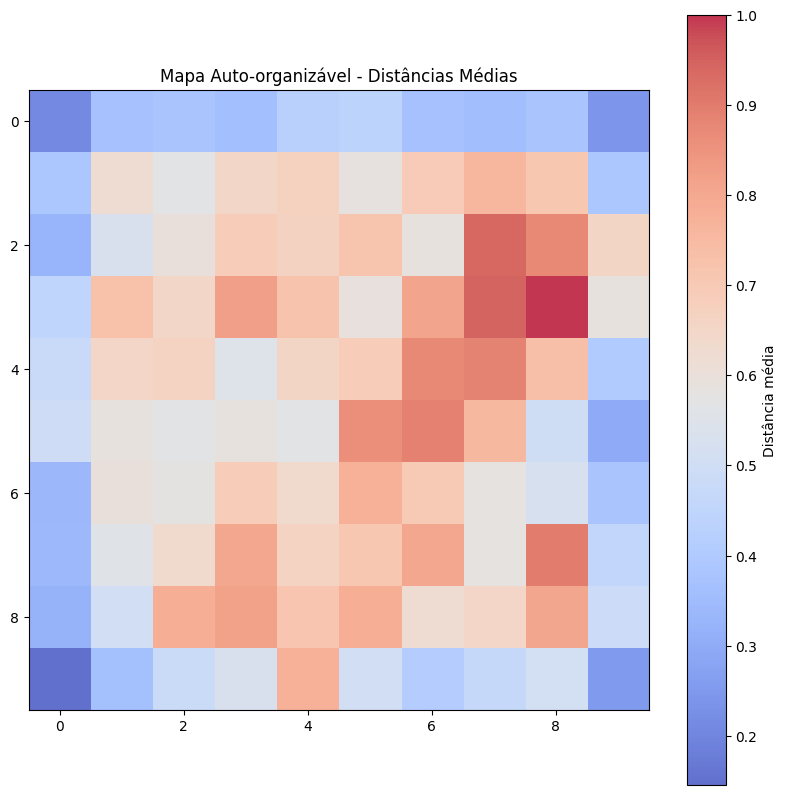

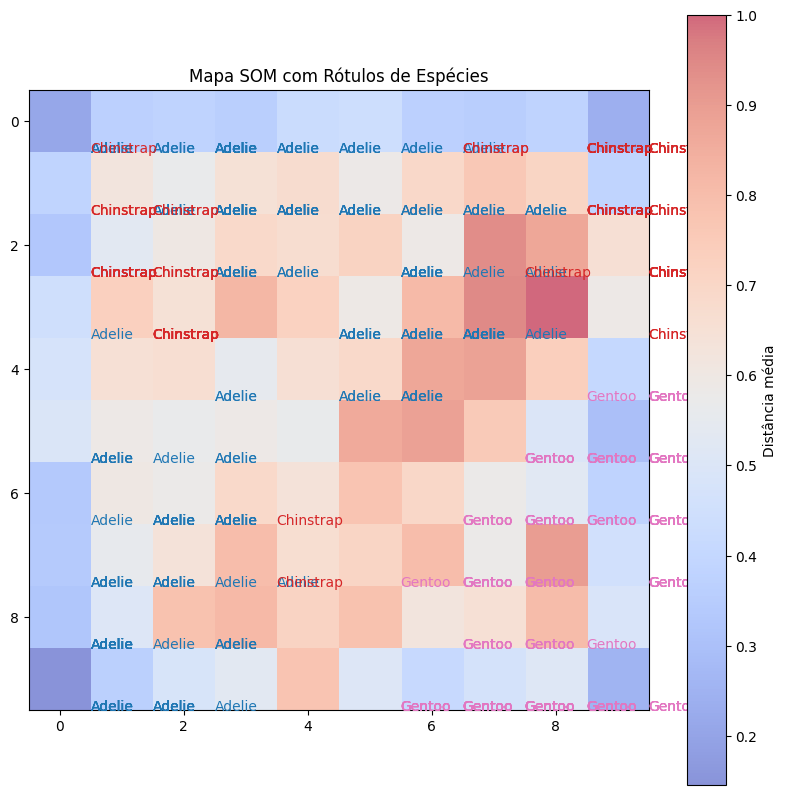

In [7]:
from palmerpenguins import load_penguins
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados Penguins
penguins = load_penguins()

# Remover valores ausentes e selecionar características numéricas
penguins = penguins.dropna()
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Configurar a Rede de Kohonen
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_scaled)

# Treinar a SOM
som.train_random(data=X_scaled, num_iteration=500)

# Matriz de distância média (visualização de topologia)
plt.figure(figsize=(10, 10))
plt.title('Mapa Auto-organizável - Distâncias Médias')
plt.imshow(som.distance_map().T, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Distância média')
plt.show()
# Converter rótulos das espécies em categorias e gerar códigos numéricos
y = penguins['species'].astype('category')  # Converter para categoria
y_codes = y.cat.codes  # Gerar códigos numéricos para as categorias

# Visualizar rótulos no SOM
plt.figure(figsize=(10, 10))
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Encontra o neurônio vencedor
    plt.text(w[0] + 0.5, w[1] + 0.5, y.iloc[i], color=plt.cm.tab10(y_codes.iloc[i] / 3), fontsize=10)

plt.imshow(som.distance_map().T, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Distância média')
plt.title('Mapa SOM com Rótulos de Espécies')
plt.show()


# redes kohonen com conjunto de dados de caracteristicas de três espécies de pinguins
# representação das cores
# as cores representam o distanciamento médio dos neurônios no mapa
# azul indica menor distancia
# vermelho maior distancia